In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

import requests
import json

In [2]:
msft = yf.Ticker("MSFT")

In [3]:
json.dumps(msft.info, indent=4)

'{\n    "address1": "One Microsoft Way",\n    "city": "Redmond",\n    "state": "WA",\n    "zip": "98052-6399",\n    "country": "United States",\n    "phone": "425 882 8080",\n    "website": "https://www.microsoft.com",\n    "industry": "Software - Infrastructure",\n    "industryKey": "software-infrastructure",\n    "industryDisp": "Software - Infrastructure",\n    "sector": "Technology",\n    "sectorKey": "technology",\n    "sectorDisp": "Technology",\n    "longBusinessSummary": "Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of in

In [4]:
hist = msft.history(period="max")

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

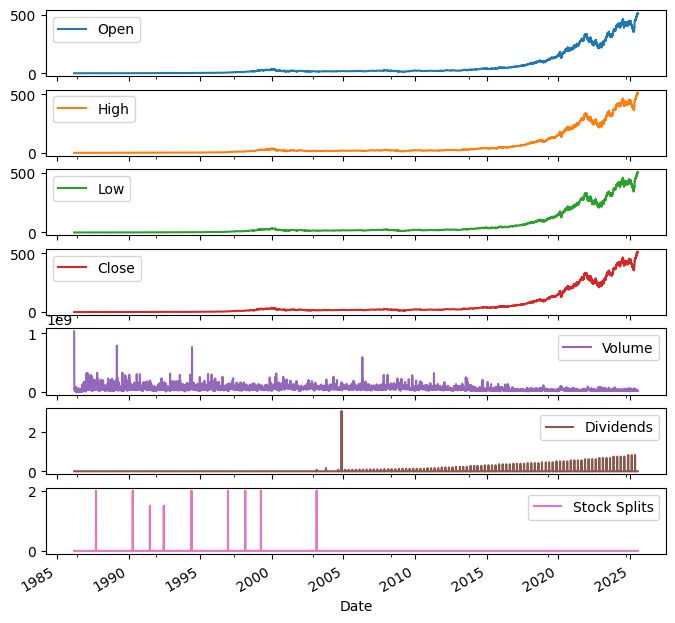

In [5]:
hist.plot(kind="line", figsize=(8, 8), subplots=True)

In [6]:

# Set headers to mimic a real browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0 Safari/537.36"
}

# Make the request with headers
url = "https://finance.yahoo.com/world-indices"
response = requests.get(url, headers=headers)

# Now read the HTML from the text content
dfs = pd.read_html(response.text)

# Grab the first table
major_indices = dfs[0]

# Display or explore the data
print(major_indices.head())

  Symbol                           Name  Unnamed: 2  \
0  ^GSPC                        S&P 500         NaN   
1   ^DJI   Dow Jones Industrial Average         NaN   
2  ^IXIC               NASDAQ Composite         NaN   
3   ^NYA           NYSE Composite Index         NaN   
4   ^XAX  NYSE American Composite Index         NaN   

                        Price  Change Change %    Volume  Day Range  \
0     6,363.35 +4.44 (+0.07%)    4.44   +0.07%    3.364B        NaN   
1  44,693.91 -316.38 (-0.70%) -316.38   -0.70%  453.006M        NaN   
2   21,057.96 +37.94 (+0.18%)   37.94   +0.18%   12.002B        NaN   
3   20,853.42 -68.42 (-0.33%)  -68.42   -0.33%         0        NaN   
4     6,072.89 -4.96 (-0.08%)   -4.96   -0.08%         0        NaN   

   52 Wk Range  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  


C:\Users\mattd\AppData\Local\Temp\ipykernel_12712\3240151873.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(response.text)


In [11]:
major_indices.head()

,Symbol,Name,Unnamed: 2,Price,Change,Change %,Volume,Day Range,52 Wk Range
0,^GSPC,S&P 500,NaN,"6,210.98 -68.37 (-1.09%)",-68.37,-1.09%,1.647B,NaN,NaN
1,^DJI,Dow Jones Industrial Average,NaN,"44,244.19 -584.34 (-1.30%)",-584.34,-1.30%,278.917M,NaN,NaN
2,^IXIC,NASDAQ Composite,NaN,"20,356.91 -244.19 (-1.19%)",-244.19,-1.19%,5.668B,NaN,NaN
3,^NYA,NYSE Composite Index,NaN,"20,451.24 -274.54 (-1.32%)",-274.54,-1.32%,0,NaN,NaN
4,^XAX,NYSE American Composite Index,NaN,"5,823.35 -54.88 (-0.93%)",-54.88,-0.93%,0,NaN,NaN


In [12]:
ticker_list = major_indices['Symbol'].dropna().str.replace("^","").str.lower().to_list()

In [13]:
len(ticker_list)

41

In [27]:
df = yf.download(ticker_list, period="1d", start="2025-01-01", end="2025-05-30")

C:\Users\mattd\AppData\Local\Temp\ipykernel_1908\2665140665.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker_list, period="1d", start="2025-01-01", end="2025-05-30")
[*********************100%***********************]  41 of 41 completed

39 Failed downloads:
['BUK100P', '125904-USD-STRD', 'FCHI', 'MERV', 'GSPTSE', 'TWII', 'IPSA', 'AXJO', 'GDAXI', 'JN0U.JO', 'N225', 'AORD', 'BSESN', 'TA125.TA', 'STOXX50E', 'N100', 'BVSP', 'FTSE', 'KS11', 'NZ50', 'CASE30', 'JKSE', 'GSPC', 'IXIC']: YFTzMissingError('possibly delisted; no timezone found')
['XAX', 'XDB', 'RUT', 'DJI', 'MOEX.ME', 'VIX', 'KLSE', 'XDN', 'HSI', 'BFX', 'NYA', 'MXX', 'XDA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2025-01-01 -> 2025-05-30)')
['000001.SS']: Timeout('Failed to perform, curl: (28) Connection timed out after 10001 milliseconds. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
['XDE']: Timeout('Failed to p

In [34]:
df

Price      Adj Close                                                          \
Ticker     000001.SS 125904-USD-STRD AORD AXJO BFX BSESN BUK100P BVSP CASE30   
Date                                                                           
2025-01-02       NaN             NaN  NaN  NaN NaN   NaN     NaN  NaN    NaN   
2025-01-03       NaN             NaN  NaN  NaN NaN   NaN     NaN  NaN    NaN   
2025-01-06       NaN             NaN  NaN  NaN NaN   NaN     NaN  NaN    NaN   
2025-01-07       NaN             NaN  NaN  NaN NaN   NaN     NaN  NaN    NaN   
2025-01-08       NaN             NaN  NaN  NaN NaN   NaN     NaN  NaN    NaN   
...              ...             ...  ...  ...  ..   ...     ...  ...    ...   
2025-05-23       NaN             NaN  NaN  NaN NaN   NaN     NaN  NaN    NaN   
2025-05-26       NaN             NaN  NaN  NaN NaN   NaN     NaN  NaN    NaN   
2025-05-27       NaN             NaN  NaN  NaN NaN   NaN     NaN  NaN    NaN   
2025-05-28       NaN             NaN  NaN  NaN NaN   NaN     NaN  NaN    NaN   
2025-05-29       NaN             NaN  NaN  NaN NaN   NaN     NaN  NaN    NaN   

Price           ...    Volume                                                 
Ticker     DJI  ...       STI STOXX50E TA125.TA TWII VIX XAX XDA XDB XDE XDN  
Date            ...                                                           
2025-01-02 NaN  ...  172246.0      NaN      NaN  NaN NaN NaN NaN NaN NaN NaN  
2025-01-03 NaN  ...  137022.0      NaN      NaN  NaN NaN NaN NaN NaN NaN NaN  
2025-01-06 NaN  ...  107140.0      NaN      NaN  NaN NaN NaN NaN NaN NaN NaN  
2025-01-07 NaN  ...   75270.0      NaN      NaN  NaN NaN NaN NaN NaN NaN NaN  
2025-01-08 NaN  ...   62102.0      NaN      NaN  NaN NaN NaN NaN NaN NaN NaN  
...         ..  ...       ...      ...      ...  ...  ..  ..  ..  ..  ..  ..  
2025-05-23 NaN  ...   59200.0      NaN      NaN  NaN NaN NaN NaN NaN NaN NaN  
2025-05-26 NaN  ...       NaN      NaN      NaN  NaN NaN NaN NaN NaN NaN NaN  
2025-05-27 NaN  ...   54000.0      NaN      NaN  NaN NaN NaN NaN NaN NaN NaN  
2025-05-28 NaN  ...   41900.0      NaN      NaN  NaN NaN NaN NaN NaN NaN NaN  
2025-05-29 NaN  ...   88200.0      NaN      NaN  NaN NaN NaN NaN NaN NaN NaN  

[103 rows x 244 columns]

In [41]:
adj_close = df.dropna(thresh=10, axis=1)['Adj Close'].drop("XAX", axis=1)


KeyError: 'Adj Close'

In [43]:
adj_close

Price            Close                   High                    Low  \
Ticker        DX-Y.NYB        STI    DX-Y.NYB        STI    DX-Y.NYB   
Date                                                                   
2025-01-02  109.389999  40.200001  109.529999  44.500000  108.269997   
2025-01-03  108.949997  38.500000  109.220001  42.150002  108.900002   
2025-01-06  108.260002  33.700001  109.070000  39.000000  107.750000   
2025-01-07  108.540001  29.150000  108.699997  34.900002  107.849998   
2025-01-08  109.089996  25.250000  109.379997  30.650000  108.550003   
...                ...        ...         ...        ...         ...   
2025-05-23   99.110001   3.160000   99.940002   3.439000   99.050003   
2025-05-26   98.930000        NaN   99.160004        NaN   98.690002   
2025-05-27   99.519997   3.410000   99.620003   3.435000   98.779999   
2025-05-28   99.879997   3.540000   99.959999   3.540000   99.440002   
2025-05-29   99.279999   3.400000  100.540001   3.720000   99.220001   

Price                        Open              Volume            
Ticker            STI    DX-Y.NYB        STI DX-Y.NYB       STI  
Date                                                             
2025-01-02  33.000000  108.529999  37.700001        0  172246.0  
2025-01-03  35.599998  109.199997  38.049999        0  137022.0  
2025-01-06  33.099998  108.919998  38.750000        0  107140.0  
2025-01-07  27.500000  108.339996  33.700001        0   75270.0  
2025-01-08  23.049999  108.620003  26.500000        0   62102.0  
...               ...         ...        ...      ...       ...  
2025-05-23   3.120000   99.879997   3.200000        0   59200.0  
2025-05-26        NaN   99.089996        NaN        0       NaN  
2025-05-27   3.120000   98.959999   3.190000        0   54000.0  
2025-05-28   3.291000   99.529999   3.400000        0   41900.0  
2025-05-29   3.290000  100.540001   3.460000        0   88200.0  

[103 rows x 10 columns]

In [44]:
adj_close.describe().T

count           mean           std          min  \
Price  Ticker                                                      
Close  DX-Y.NYB  103.0     104.135922  3.598337e+00    98.279999   
       STI       101.0      12.206733  9.088242e+00     3.020000   
High   DX-Y.NYB  103.0     104.546602  3.566495e+00    99.160004   
       STI       101.0      13.223584  9.872368e+00     3.290000   
Low    DX-Y.NYB  103.0     103.745922  3.629212e+00    97.919998   
       STI       101.0      11.471545  8.493941e+00     2.940000   
Open   DX-Y.NYB  103.0     104.212718  3.551638e+00    98.300003   
       STI       101.0      12.422871  9.240260e+00     3.030000   
Volume DX-Y.NYB  103.0       0.000000  0.000000e+00     0.000000   
       STI       101.0  288725.346535  1.425611e+06  9700.000000   

                          25%           50%           75%           max  
Price  Ticker                                                            
Close  DX-Y.NYB    100.294998    104.040001    107.650002  1.099600e+02  
       STI           5.100000      7.000000     20.400000  4.020000e+01  
High   DX-Y.NYB    100.770000    104.309998    108.075001  1.101800e+02  
       STI           5.600000      7.700000     21.250000  4.450000e+01  
Low    DX-Y.NYB     99.810001    103.750000    107.400002  1.094100e+02  
       STI           4.750000      6.550000     19.600000  3.560000e+01  
Open   DX-Y.NYB    100.590000    104.110001    107.785000  1.096400e+02  
       STI           5.200000      7.000000     20.500000  3.875000e+01  
Volume DX-Y.NYB      0.000000      0.000000      0.000000  0.000000e+00  
       STI       21530.000000  41900.000000  90462.000000  1.169397e+07

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

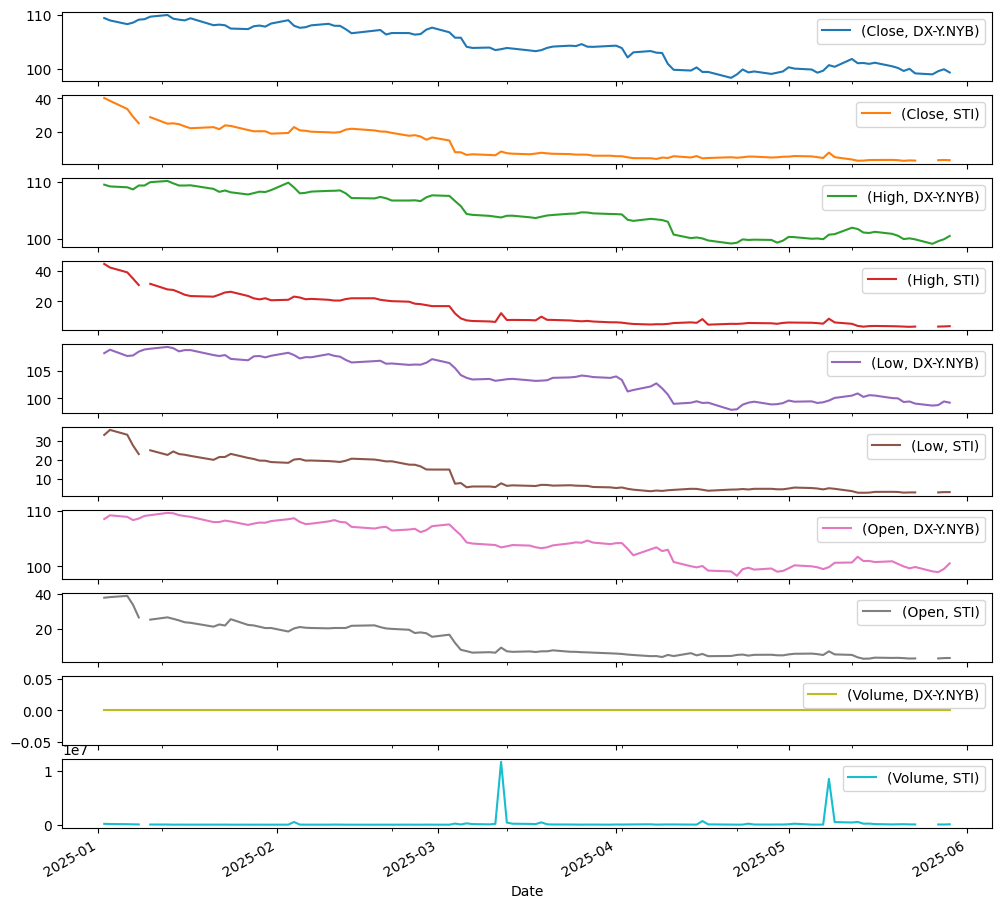

In [45]:
adj_close.plot(figsize=(12,12), subplots=True)